In [100]:
import cv2
import imageio
import random
import os
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
path_annotations = "/content/drive/MyDrive/birds/birds/annotations/" 
images_dir = "/content/drive/MyDrive/birds/birds/"

In [103]:
labels_dict = {1: 'Eurasian_jay',
 2: 'great_spotted_woodpecker',
 3: 'greenfinch',
 4: 'blue_tit',
 5: 'Carduelis',
 6: 'common_redpoll',
 7: 'great_tit',
 8: 'bullfinch',
 9: 'Eurasian_siskin',
 10: 'Eurasian_tree_sparrow',
 11: 'hawfinch',
 12: 'willow_tit',
 13: 'Fieldfare',
 14: 'Common_chaffinch'}
n_classes = len(labels_dict)  # number of classes
color_dict = {i+1:color/255 for i,color in enumerate(np.random.uniform(0, 255, size=(n_classes, 3)))}



In [127]:
def load_labels_dict(path = "", lang = "en" ):
    '''
    Loads labels dictionary in nessesary language
    Args:
        path (str): path to dictionary file
        lang (str): desired language, can be only 'en', 'jp', 'ru'
    Returns:
        labels_dict (dict): dictionary with labels

    '''
    lang_list = ['en', 'ru', 'jp']
    if lang not in lang_list:
        raise ValueError("results: status must be one of %r." % lang_list)
    file = 'labels_' + lang + '.pickle'
    path = os.path.join(path, file)
    with open(file, 'rb') as handle:
        labels_dict = pickle.load(handle)
    return labels_dict

In [106]:
def xml_transform(xml_path):
    xml = ET.parse(xml_path)
    root = xml.getroot()
    img_name = root[1].text
    labels, boxes = [], [] 
    
    for obj in root.iter('object'):
        label = obj[0].text
        if label == 'Common chaffinch':
            label = 'Common_chaffinch'
        label = [label == species for species in labels_dict.values()].index(True) + 1
        labels.append(label)
        box = [int(coord.text) for coord in obj[4]]
        boxes.append(box)
    target = {'boxes' : boxes,
              'labels' : labels}
    return img_name, target

In [122]:
from PIL import ImageFont, ImageDraw, Image

def images_for_gif(path_annotations, images_dir, path_to_dict, lang, color_dict,
                   sample_size, thickness=2, seed=2234):
    '''
    Loads images and add frame and text to them.
    Args:
        path_annotations  (str): path to anntotations folder
        images_dir (str): path to folder with images
        labels_dict (dict): dictionary with labels
        color_dict (dict): dictionary with colors of frames
        sample_size (int): number of images
        thickness (int): thickness of frame as text
        seed (int): random seed

    returns: (list): list of images
    '''
    labels_dict = load_labels_dict(path_to_dict, lang)
    if lang =='jap':
        fontpath = "./kochi-gothic-subst.ttf"     
        font = ImageFont.truetype(fontpath, 32)
    elif lang == "ru":
        fontpath = "./Times.ttf"     
        font = ImageFont.truetype(fontpath, 32)
    elif lang == "eng":
        fontpath = "./Times.ttf"     
        font = ImageFont.truetype(fontpath, 32)
    img_list = []
    random.seed(seed)
    path_list = [os.path.join(path_annotations,path) for path in os.listdir(path_annotations)]
    sample_images = random.sample(path_list, sample_size)
    for path in sample_images:
        img_name, target = xml_transform(path)
        img_name = os.path.join(images_dir, img_name)
        img = cv2.imread(img_name)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        for box, i in zip(target['boxes'], target['labels']):
            x_min, y_min, x_max, y_max = box
            start = (x_min, y_min)
            end = (x_max, y_max)
            color = tuple([int(255*col) for col in color_dict[i]])
            cv2.rectangle(img, start, end, color, thickness)
            img_pil = Image.fromarray(img)
            draw = ImageDraw.Draw(img_pil)
            draw.text(start,  text=labels_dict[i], font = font,
                      fill = "black", stroke_width = thickness-1  )
            img = np.array(img_pil)
        img = cv2.resize(img, (500, 400), interpolation=cv2.INTER_AREA )
        img_list.append(img)
    return img_list  

In [125]:
imgs = images_for_gif(path_annotations, images_dir, path_to_dict = "", lang='jap',
                      color_dict = color_dict, sample_size=20, thickness=2,
                      seed=2234)

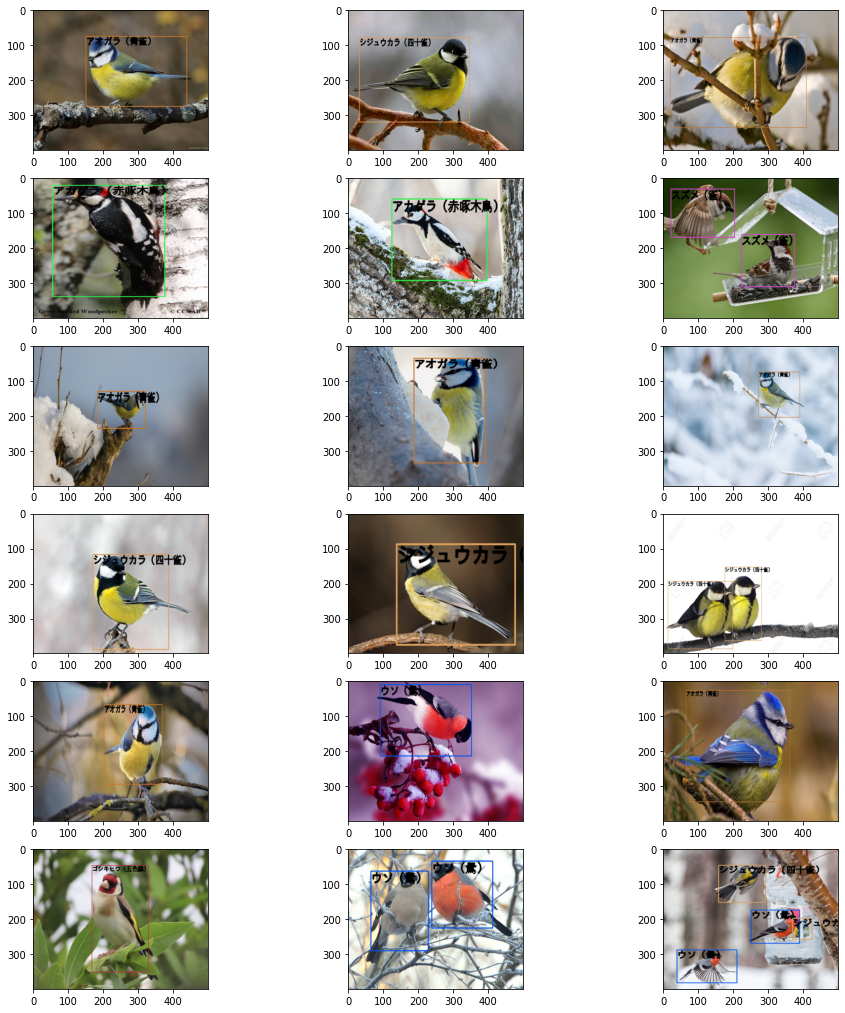

In [126]:
fig, axes = plt.subplots(6, 3, figsize = (16,18) )
for i, ax in enumerate(axes.flatten()):
    ax.imshow(imgs[i])

In [99]:
print("Saving GIF file")
with imageio.get_writer("birds_labels_rus.gif", mode="I", fps = 3) as writer:
    for idx, frame in enumerate(imgs):
        print("Adding frame to GIF file: ", idx + 1)
        writer.append_data(frame)

Saving GIF file
Adding frame to GIF file:  1
Adding frame to GIF file:  2
Adding frame to GIF file:  3
Adding frame to GIF file:  4
Adding frame to GIF file:  5
Adding frame to GIF file:  6
Adding frame to GIF file:  7
Adding frame to GIF file:  8
Adding frame to GIF file:  9
Adding frame to GIF file:  10
Adding frame to GIF file:  11
Adding frame to GIF file:  12
Adding frame to GIF file:  13
Adding frame to GIF file:  14
Adding frame to GIF file:  15
Adding frame to GIF file:  16
Adding frame to GIF file:  17
Adding frame to GIF file:  18
Adding frame to GIF file:  19
Adding frame to GIF file:  20
